In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

scalability_log_file_paths = ['../results/scalability-onrobot.log']

# Estrarre righe dal file e creare un DataFrame
data = []
pattern = r'Configuration: {"goal": "(?P<dispositions>\d+) dispositions, (?P<conditions>\d+) activated conditions.*?Test counter: (?P<test_counter>\d+).*?Negotiation time: (?P<time>\d+\.\d+) seconds. Rounds: (?P<rounds>\d+).*?'

for log_file_path in scalability_log_file_paths:
    with open(log_file_path, 'r') as file:
        for line in file:
            match = re.search(pattern, line)
            if match:
                dispositions = int(match.group("dispositions"))
                conditions = int(match.group("conditions"))
                rounds = int(match.group("rounds")) // 2 + (int(match.group("rounds")) % 2 > 0)
                time = float(match.group("time"))
                data.append({"dispositions": dispositions, "conditions": conditions, "rounds":rounds, "negotiation_time": time})

# Creare il DataFrame
df = pd.DataFrame(data)
df.head()

,dispositions,conditions,rounds,negotiation_time
0,25,10,3,0.328
1,25,10,2,0.216
2,25,10,2,0.261
3,25,10,3,0.336
4,25,10,3,0.326


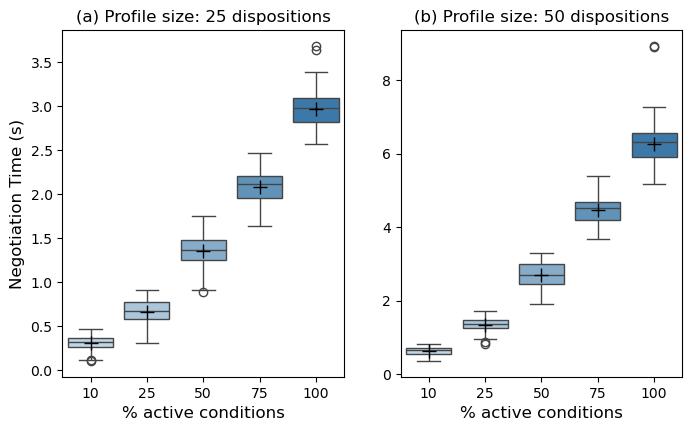

In [2]:
plotting_df = df[(df["dispositions"] != 500)]
plotting_df["rounds"] = plotting_df["rounds"]

dispositions_list = plotting_df["dispositions"].unique()
conditions_list = plotting_df["conditions"].unique()

num_dispositions = 2
num_conditions = len(conditions_list)
fig, axes = plt.subplots(1, 2, figsize=(8, 4.5))
#plt.title = "Negotiation Time by Profile Size and Activated Conditions"

chart_counter = 0
for i, dispositions in enumerate([25,50]):
    ax = axes[i] if i < num_dispositions else None
    if ax:
        subset = plotting_df[plotting_df["dispositions"] == dispositions]
        sns.boxplot(data=subset, x="conditions", y="negotiation_time", ax=ax, palette="blend:#bad6eb,#2b7bba", hue="conditions", legend=False, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"}
            )
        ax.set_title(f"({['a', 'b', 'c', 'd', 'e'][chart_counter]}) Profile size: {dispositions} dispositions")
        ax.set_xlabel("% active conditions", fontsize=12)
        if i == 0:
            ax.set_ylabel("Negotiation Time (s)", fontsize=12)
        else:
            ax.set_ylabel(" ")
        chart_counter += 1
    else:
        pass


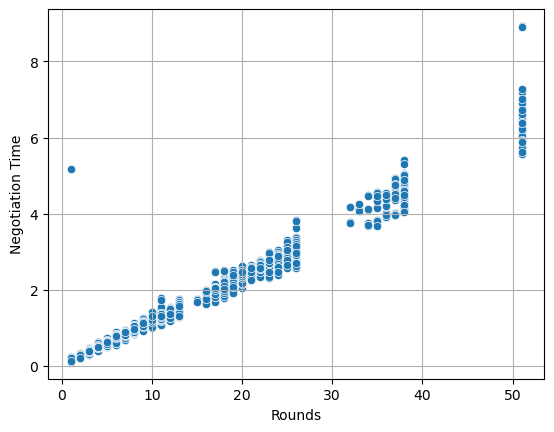

In [3]:
sns.scatterplot(data=plotting_df, x='rounds', y='negotiation_time')
#plt.title('Correlation between Rounds and Negotiation Time')
plt.xlabel('Rounds')
plt.ylabel('Negotiation Time')
plt.grid(True)
plt.show()

In [4]:
check_df = df[(df['rounds'] < 10) & (df['negotiation_time'] > 4)]

check_df

,dispositions,conditions,rounds,negotiation_time
963,50,100,1,5.186


In [5]:
mean_negotiation_time = df.groupby(['dispositions', 'conditions'])['negotiation_time'].mean().reset_index()

mean_negotiation_time

,dispositions,conditions,negotiation_time
0,25,10,0.314030
1,25,25,0.668830
2,25,50,1.358600
3,25,75,2.081610
4,25,100,2.963296
5,50,10,0.626940
6,50,25,1.350492
7,50,50,2.697015
8,50,75,4.465250
9,50,100,6.274863


Runs with negotiation time <= 3 seconds: 1818 (76.52%) over 2376 runs


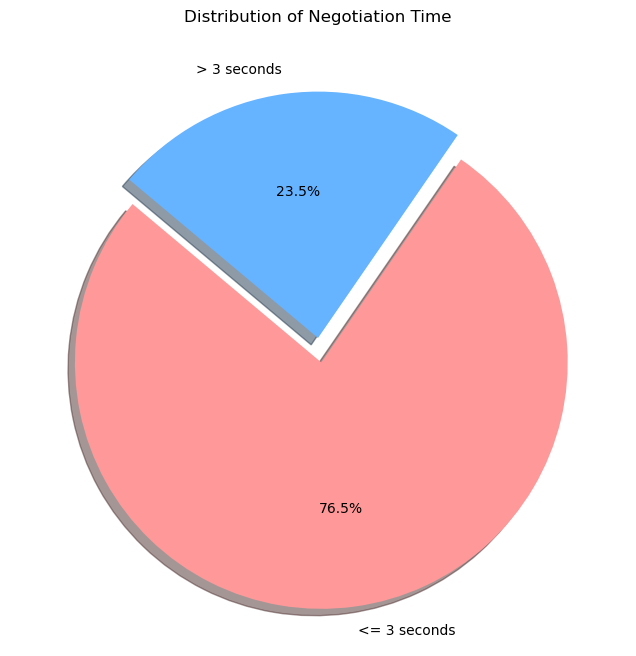

In [6]:
# Calcolare il numero di volte in cui il negotiation_time è inferiore o uguale a 3
count_less_equal_3 = plotting_df[plotting_df['negotiation_time'] <= 3].shape[0]
count_total = plotting_df.shape[0]
count_greater_3 = count_total - count_less_equal_3

print(f"Runs with negotiation time <= 3 seconds: {count_less_equal_3} ({count_less_equal_3/count_total*100:.2f}%) over {count_total} runs")

# Creare i dati per il grafico a torta
labels = ['<= 3 seconds', '> 3 seconds']
sizes = [count_less_equal_3, count_greater_3]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # "explode" the 1st slice

# Creare il grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Negotiation Time')
plt.show()